In [1]:
#Никишев И.О. 224-321

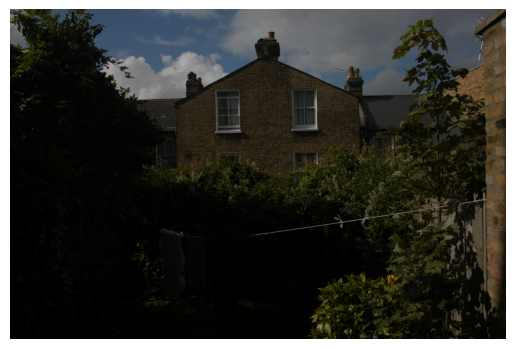

In [1]:
image = '1.jpg'
import cv2, matplotlib.pyplot as plt, numpy as np, math
bgr = cv2.imread(image)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
def a(a):
    plt.axis('off')
    plt.imshow(a, cmap='gray', vmin=0, vmax=255)
a(rgb)

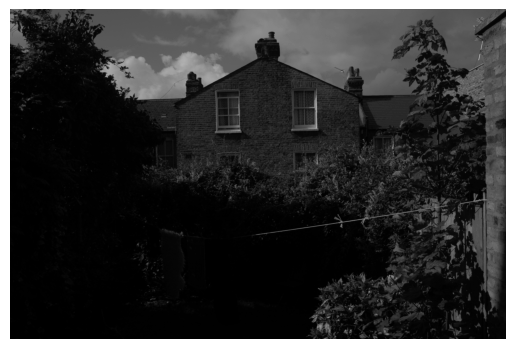

In [2]:
lab = cv2.cvtColor(bgr, cv2.COLOR_BGR2LAB)
bw = lab[:,:,0] # Перевод в ч/б
a(bw)

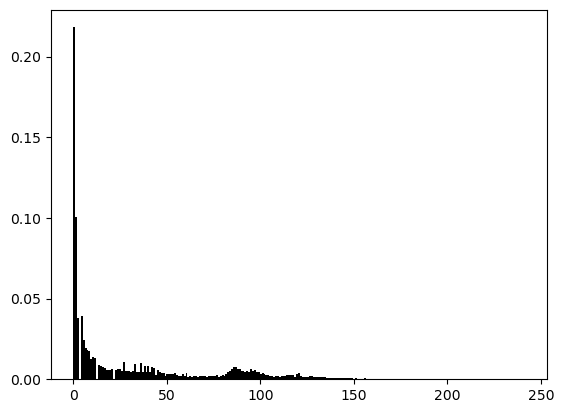

In [4]:
nk = bw.size # кол-во пикселей
bwf = bw.flatten() # одномерный массив пикселей для их подсчёта
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

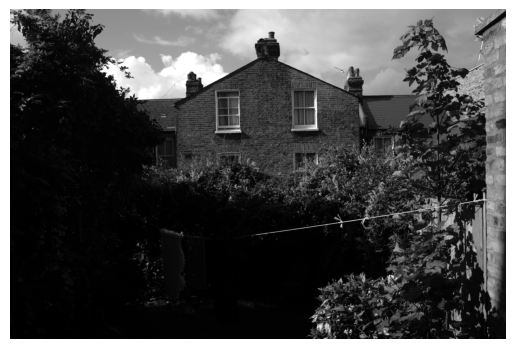

In [5]:
norm = np.clip(0 + bw*(255/150), 0, 255) # нормализация до 0-255
a(norm)

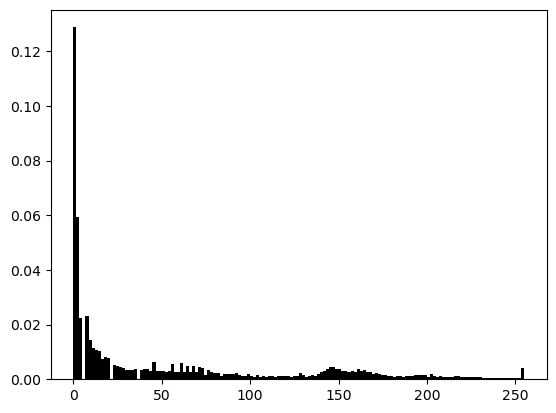

In [6]:
bwf = norm.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

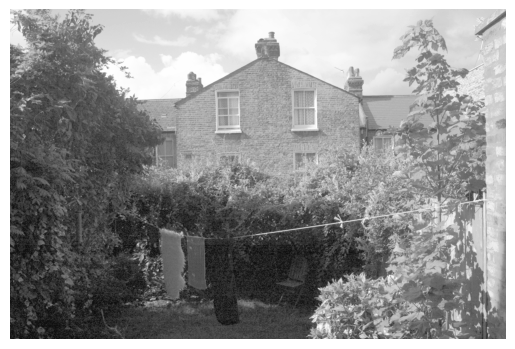

In [7]:
import numpy as np
bwf = bw.flatten()
hist = np.cumsum(np.bincount(bwf)/nk) # каждое значение заменяется количеством этого значения в массиве, делится на общее кол-во, и из всего этого строится кумулятивная гистограмма
def equalize1(i, hist = hist): return 255*hist[i]
equalize = np.vectorize(equalize1, excluded=[1])
eq = equalize(bw, hist).astype(np.uint8) # Все пиксели изображения меняют значения из кумулятивной гистограммы 
a(eq)

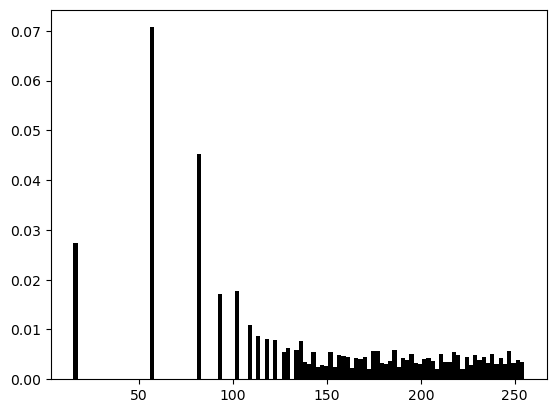

In [8]:
bwf = eq.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

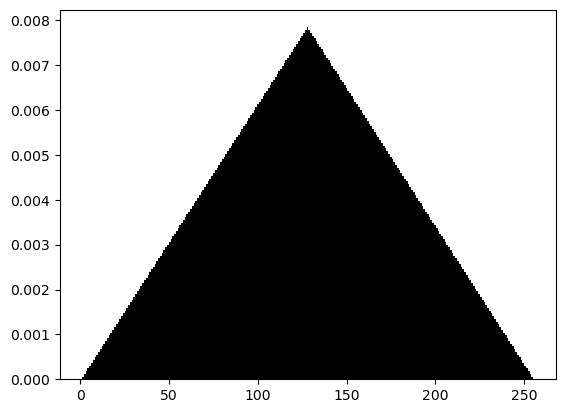

In [37]:
func = [[i]*(128 - abs(128-i)) for i in range(256)] # Изображение с кол-вом пикселей соответствующем необходиой гистограмме
import itertools
func = list(itertools.chain(*func))
func = np.array([func, func])
bwf = func.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None

[[171.13300507 169.05337358 172.61518175 ... 182.60864121 184.43951334
  180.91231773]
 [170.87201202 168.58615016 169.05337358 ... 178.38934291 182.60864121
  182.60864121]
 [170.08014218 171.51635664 174.06962122 ... 176.19327552 178.38934291
  179.47457559]
 ...
 [ 84.76545682  84.76545682  44.50560757 ... 117.90070105 117.90070105
  117.90070105]
 [ 84.76545682  84.76545682  84.76545682 ... 114.45248622 108.60083232
  114.45248622]
 [ 44.50560757  84.76545682  84.76545682 ... 114.45248622 108.60083232
  108.60083232]]


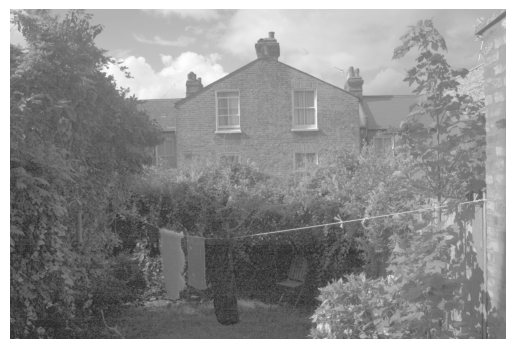

In [35]:
from skimage.exposure import match_histograms
m = match_histograms(bw, func, channel_axis=None)
print(m)
a(m)

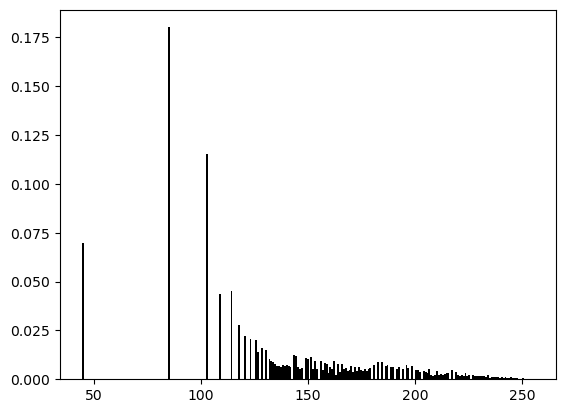

In [36]:
bwf = m.flatten()
plt.hist(bwf, bins = len(np.unique(bwf)), density=True, stacked=True, color='black')
None